UNIVERSIDAD CATÓLICA BOLIVIANA”SAN PABLO”
MAESTRÍA EN CIENCICIA DE DATOS Versión 4
MATERIA MINERIA DE DATOS 1
DATASET DE PRÁCTICA
DATASET CREDITO
1.	Quitar filas duplicadas
2.	Quitar columnas duplicadas
3.	Identificar columnas que tienen valores constantes
4.	Identifique el porcentaje de valores faltantes en las columnas
5.	Para el dataset hacer un análisis gráfico documentado de las variables:
•	Histograms
•	Quartiles
•	Scatter plots
•	Distributions
•	Boxplots
•	Bar plot
•	Heatmaps
6.	Aplicar expresión matemática para el cálculo (CreditAmount / Duración)*residence_since
7.	Discretizar duración, credit_amount, age, number_of_dependents.
8.	Obtenga la matriz de correlación de las variables numéricas.
9.	Obtenga la tabla de relación de frecuencias entre los atributos job y purpose.
10.	Mapear a valores diferentes para atributos own_telephone, foreign_worker.
11.	Normalizar el campo instalment_commitment
12.	Estandarizar el campo instalment_commitment 
13.	De los gráficos Boxplot obtenidos quitar outliers por medio de Inter-quartil range
14.	Utilice One-hot encoding en campo purpose.
15.	Obtenga las instancias que cumplan la condición de un monto de crédito mayor a 3000
16.	Obtenga las instancias que cumplen con la condición de que job sea igual a “skilled” y que el monto de crédito sea mayor a 2000.
17.	Obtenga suma total del camp credit_amount agrupado por el campo purpose “new car”.
18.	Obtenga age y class para los registros que tienen campo purpose “education” y housing “for_free”.
19.	Obtenga el total y el promedio de credit amount agrupado por housing y class.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import numpy as np

In [3]:
#importar el dataset
df = pd.read_csv('1_credit.csv')
df.head()  

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,car,31,none,own,1,skilled,2,yes,yes,good
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,no_known_property,31,bank,for_free,1,skilled,1,yes,yes,good
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,car,25,none,own,1,skilled,1,none,yes,good
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,real_estate,56,none,own,1,skilled,1,none,yes,good
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,real_estate,41,none,rent,1,unskilled resident,1,none,yes,good


In [4]:
#revisar si hay valores nulos
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [5]:
#describir el tipo de datos del dataframe
df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [6]:
#revisar si hay valores duplicados, en caso de que si, eliminarlos
df.duplicated().sum()
if df.duplicated().sum() > 0:
    print('Hay valores duplicados')
    #df.drop_duplicates(inplace=True)
else:
    print('No hay valores duplicados')


No hay valores duplicados


In [7]:
'''1. Quitar filas duplicadas'''
#crear una funcion que quite las filas duplicadas
def drop_duplicate(df):
    df.drop_duplicates(inplace=True)
    return df
'''2. Quitar columnas duplicadas'''
#crear una funcion que quite las columnas duplicadas
def drop_duplicate_columns(df):
    df.drop_duplicates(axis=1,inplace=True)
    return df

#crear una funcion que quite las filas duplicadas usando solo for
'''def drop_duplicate_for(df):
    for i in range(len(df)):
        for j in range(i+1,len(df)):
            if df.iloc[i].equals(df.iloc[j]):
                df.drop(index=j,inplace=True)
    return df'''
#crear una funcion que quite las columnas duplicadas usando solo for
'''def drop_duplicate_columns_for(df):
    for i in range(len(df.columns)):
        for j in range(i+1,len(df.columns)):
            if df.iloc[:,i].equals(df.iloc[:,j]):
                df.drop(columns=df.columns[j],inplace=True)
    return df'''

'def drop_duplicate_columns_for(df):\n    for i in range(len(df.columns)):\n        for j in range(i+1,len(df.columns)):\n            if df.iloc[:,i].equals(df.iloc[:,j]):\n                df.drop(columns=df.columns[j],inplace=True)\n    return df'

In [8]:
'''3. Identificar columnas que tienen valores constantes'''
# agrupar las columnas por dtypes y objets en distntos dataframes
df_num = df.select_dtypes(include=['int64','float64'])
df_obj = df.select_dtypes(include=['object'])
print(df_num.dtypes, df_obj.dtypes, sep='\n')


duration                  int64
credit_amount             int64
installment_commitment    int64
residence_since           int64
age                       int64
existing_credits          int64
num_dependents            int64
dtype: object
checking_status        object
credit_history         object
purpose                object
savings_status         object
employment             object
personal_status        object
other_parties          object
property_magnitude     object
other_payment_plans    object
housing                object
job                    object
own_telephone          object
foreign_worker         object
class                  object
dtype: object


In [25]:
#df_num.head(10)
#df_num.describe()
#verificar los valores minimos y maximos de las columnas de df_num e imprimir los valores en el rango encontrado
df_num.describe().loc[['min','max']]

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
min,4.0,448.0,1.0,1.0,19.0,1.0,1.0
max,60.0,18424.0,4.0,4.0,64.0,4.0,2.0


In [30]:
#revisar si hay valores constantes en las columnas de df_num
df_num.nunique()

duration                  15
credit_amount             49
installment_commitment     4
residence_since            4
age                       29
existing_credits           4
num_dependents             2
dtype: int64

In [32]:
df_obj.head(10)

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,no_checking,existing_paid,radio_tv,between_500_1000,>=7,male single,none,car,none,own,skilled,yes,yes,good
1,no_checking,critical_other_existing_credit,education,less_th_100,1<=X<4,male single,none,no_known_property,bank,for_free,skilled,yes,yes,good
2,no_checking,existing_paid,radio_tv,less_th_100,1<=X<4,male single,none,car,none,own,skilled,none,yes,good
3,no_checking,critical_other_existing_credit,radio_tv,less_th_100,>=7,male single,none,real_estate,none,own,skilled,none,yes,good
4,no_checking,existing_paid,new_car,between_100_500,>=7,male mar_wid,none,real_estate,none,rent,unskilled resident,none,yes,good
5,less_th_0,critical_other_existing_credit,new_car,less_th_100,1<=X<4,female div_dep_mar,'co applicant',real_estate,none,own,skilled,none,yes,bad
6,no_checking,existing_paid,furniture_equipment,less_th_100,<1,male single,none,life_insurance,bank,own,unskilled resident,none,yes,good
7,between_0_200,existing_paid,furniture_equipment,greater_th_1000,<1,female div_dep_mar,none,real_estate,none,own,skilled,none,yes,good
8,less_th_0,existing_paid,new_car,less_th_100,1<=X<4,male mar_wid,none,real_estate,none,own,unskilled resident,none,yes,good
9,no_checking,delayed_previously,business,less_th_100,4<=X<7,male single,none,car,none,own,skilled,none,yes,good


In [62]:
#imprimir los valores unicos de las columnas de df_obj por categoria
for i in df_obj.columns:
    print(i,':',df_obj[i].unique(),sep='\n')
    print('\n')

checking_status
:
['no_checking' 'less_th_0' 'between_0_200' 'greater_th_200']


credit_history
:
['existing_paid' 'critical_other_existing_credit' 'delayed_previously'
 'no_credits_all_paid' 'all_paid']


purpose
:
['radio_tv' 'education' 'new_car' 'furniture_equipment' 'business'
 'used_car' 'other' 'repairs']


savings_status
:
['between_500_1000' 'less_th_100' 'between_100_500' 'greater_th_1000'
 'no_known_savings']


employment
:
['>=7' '1<=X<4' '<1' '4<=X<7' 'unemployed']


personal_status
:
['male single' 'male mar_wid' 'female div_dep_mar' 'male div_sep']


other_parties
:
['none' "'co applicant'" 'guarantor']


property_magnitude
:
['car' 'no_known_property' 'real_estate' 'life_insurance']


other_payment_plans
:
['none' 'bank' 'stores']


housing
:
['own' 'for_free' 'rent']


job
:
['skilled' 'unskilled resident' 'high qualif_self emp_mgmt'
 'unemp_unskilled non res']


own_telephone
:
['yes' 'none']


foreign_worker
:
['yes' 'no']


class
:
['good' 'bad']




In [61]:
df_obj.nunique()

checking_status        4
credit_history         5
purpose                8
savings_status         5
employment             5
personal_status        4
other_parties          3
property_magnitude     4
other_payment_plans    3
housing                3
job                    4
own_telephone          2
foreign_worker         2
class                  2
dtype: int64

In [13]:
'''4. Identifique el porcentaje de valores faltantes en las columnas'''
# identificar el porcentaje de valores faltantes en las columnas
if df.isnull().sum().sum() > 0:
    print('Hay valores faltantes')
    print(df.isnull().sum()/len(df)*100)
else:
    print('No hay valores faltantes')
        

No hay valores faltantes


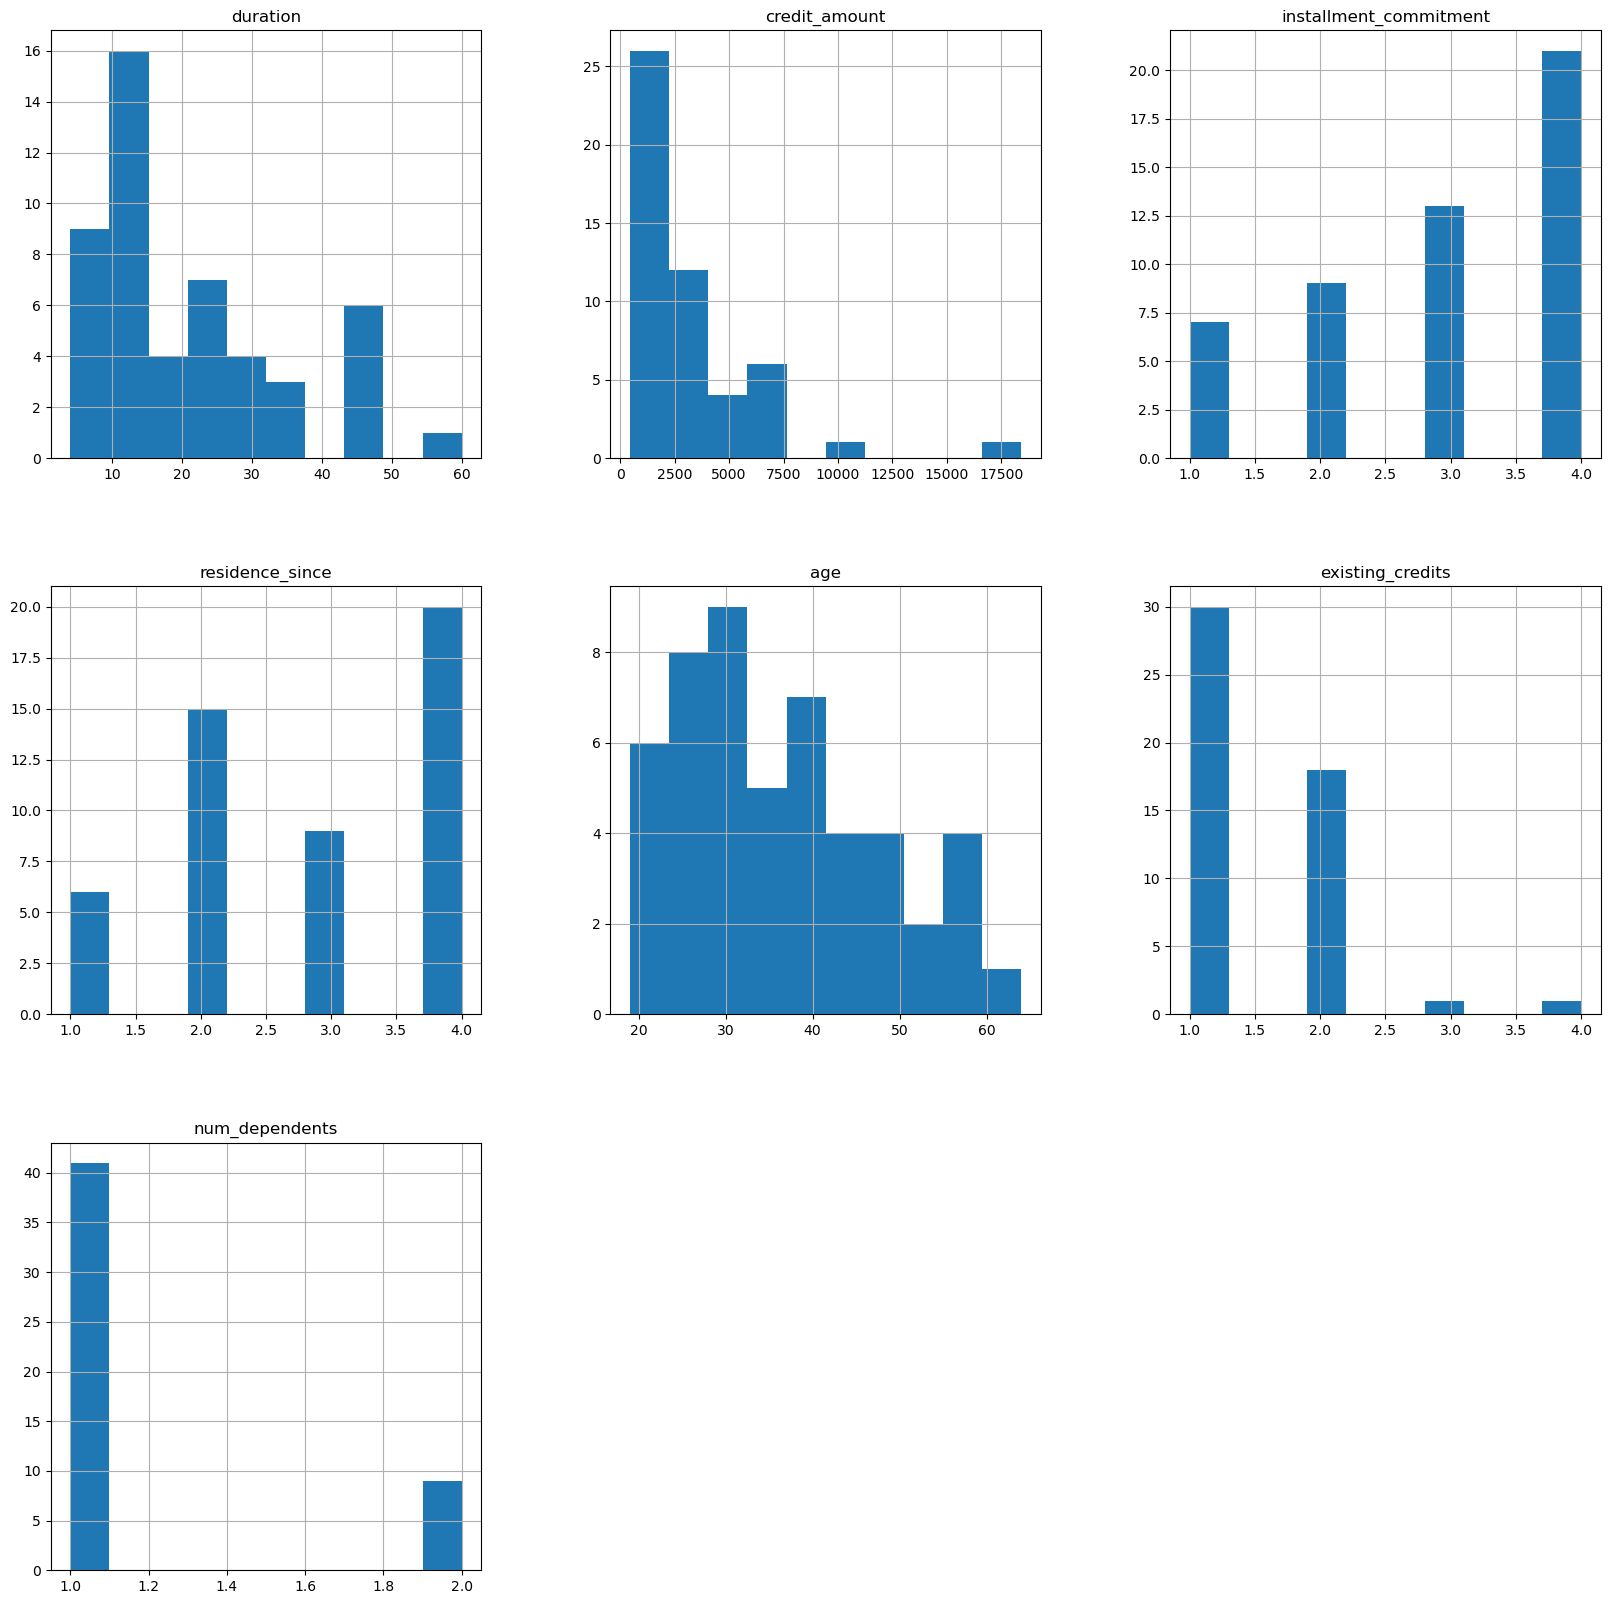

In [14]:
'''5. Para el dataset hacer un análisis gráfico documentado de las variables: Histograms, Quartiles, Scatter plots, Distributions, Boxplots, Bar plot, Heatmaps'''
#graficar los histogramas del df
hist = df.hist(figsize=(20,20))

<Axes: >

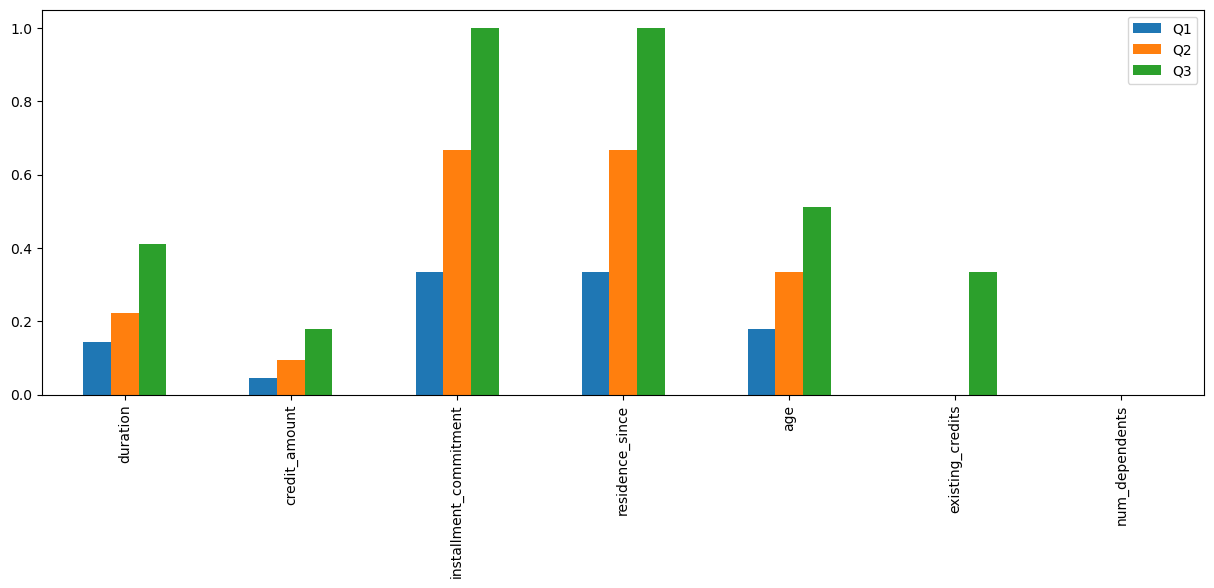

In [28]:
#graficar los quartiles del df
#normalizar df_num
df_norm = (df_num - df_num.min())/(df_num.max() - df_num.min())
quartiles = df_norm.quantile([0.25,0.5,0.75])
quartiles = quartiles.T
quartiles = quartiles.rename(columns={0.25:'Q1',0.5:'Q2',0.75:'Q3'})
#realizar un plot de los quartiles para cada columna
quartiles.plot(kind='bar',figsize=(15,5))

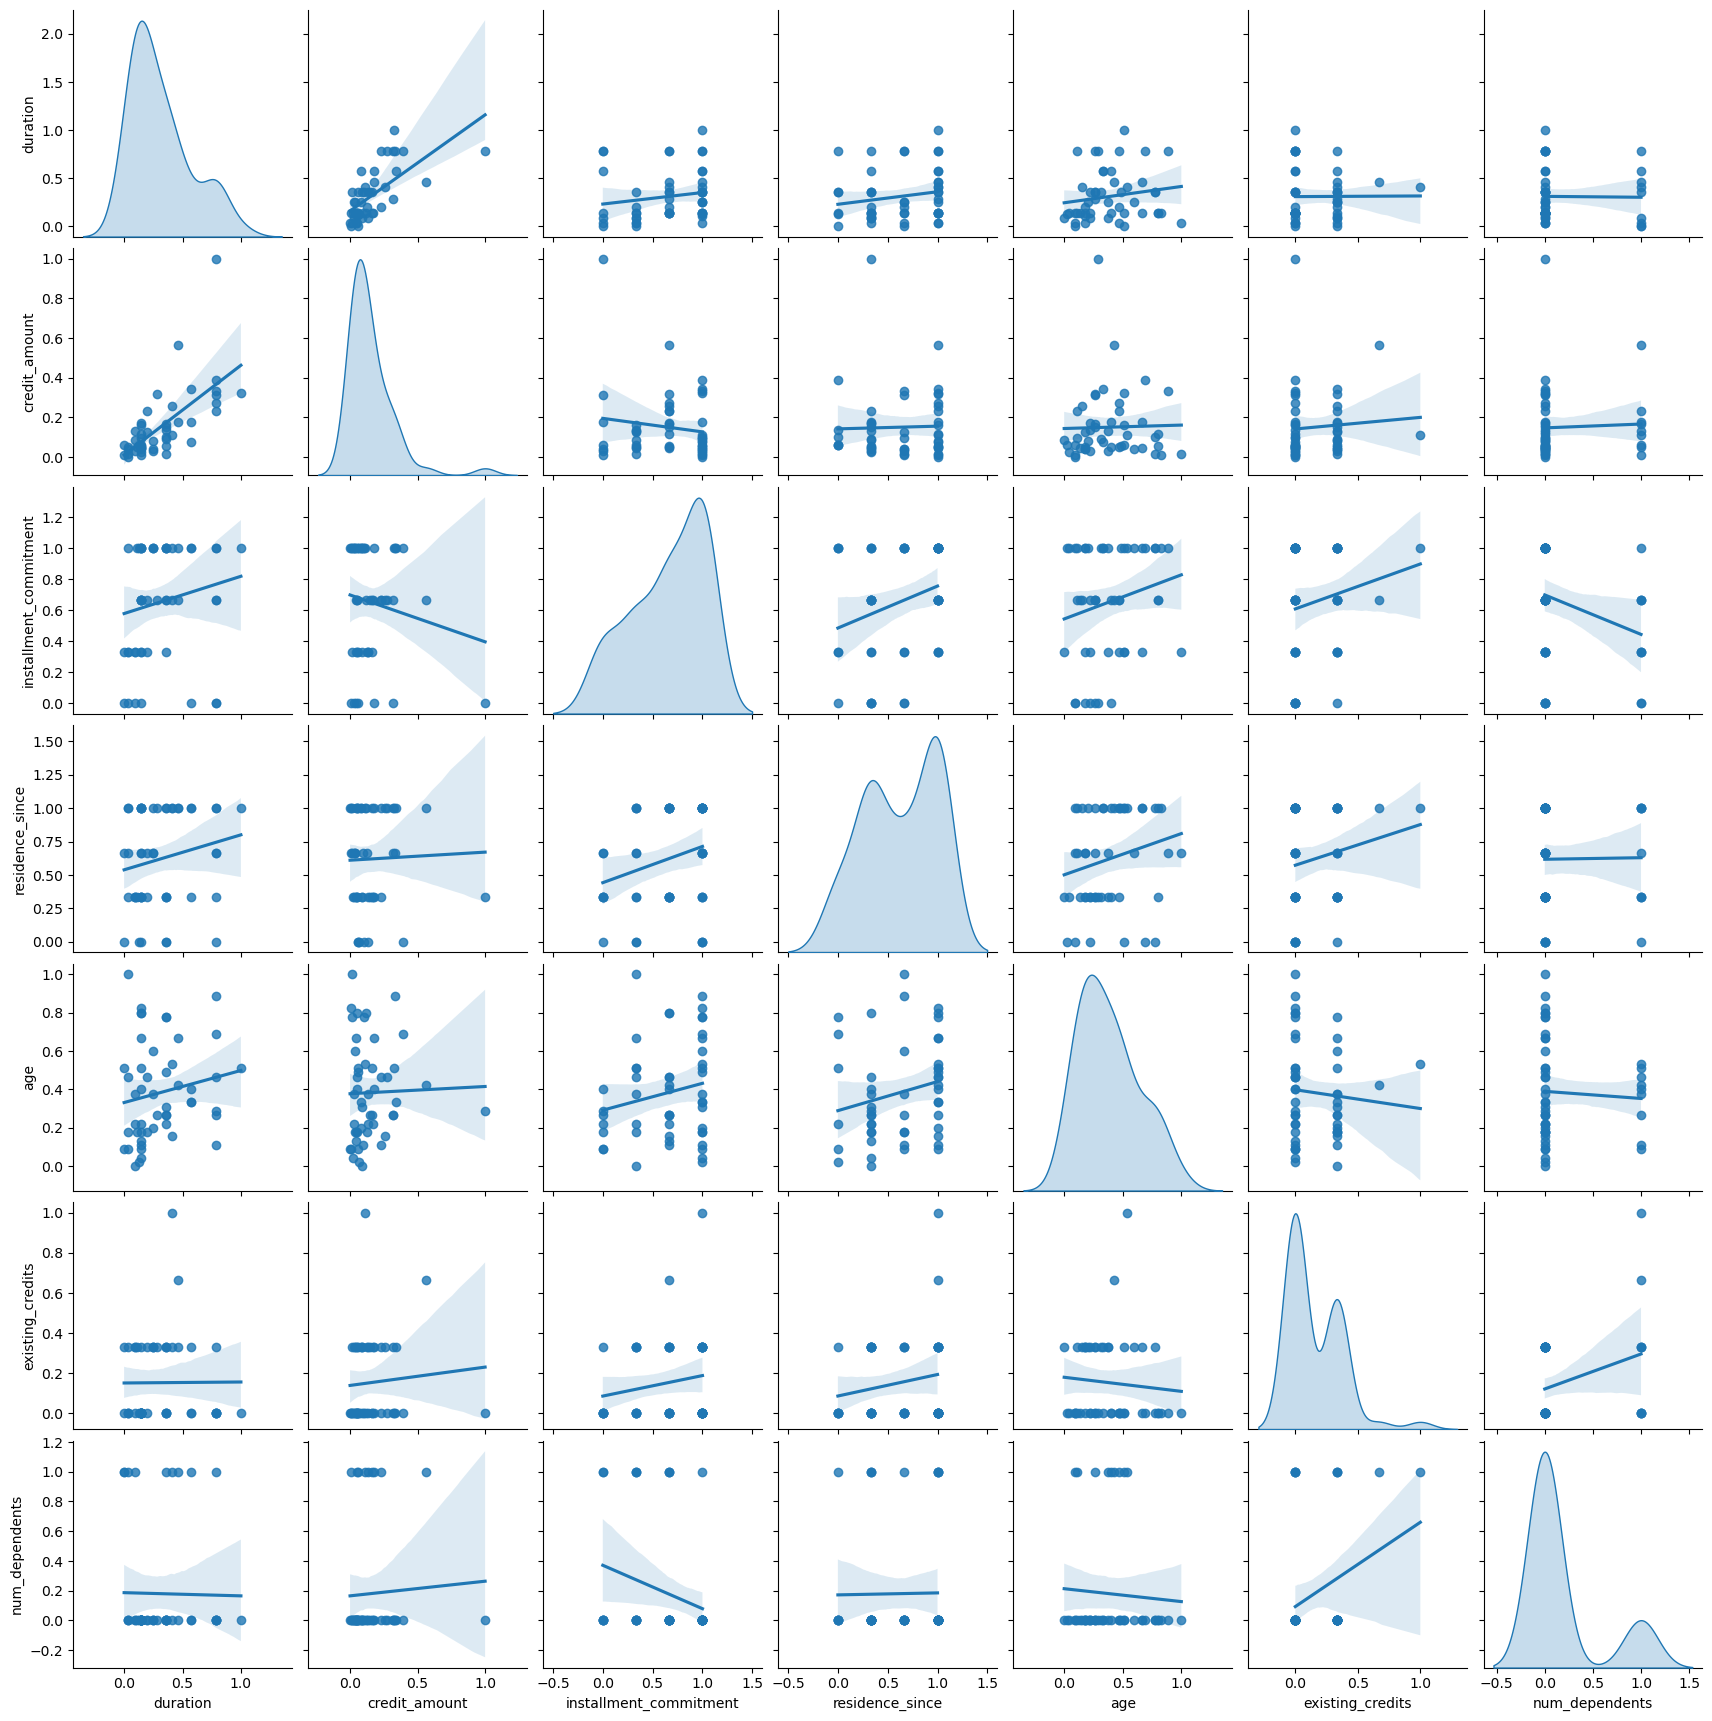

In [29]:
#graficar los scatter plots del df con linea de tendencia
scatter = sb.pairplot(df_norm, kind='reg', diag_kind='kde', height=2.5)

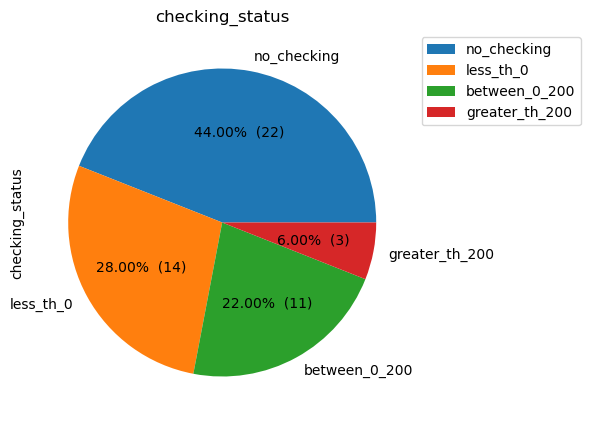

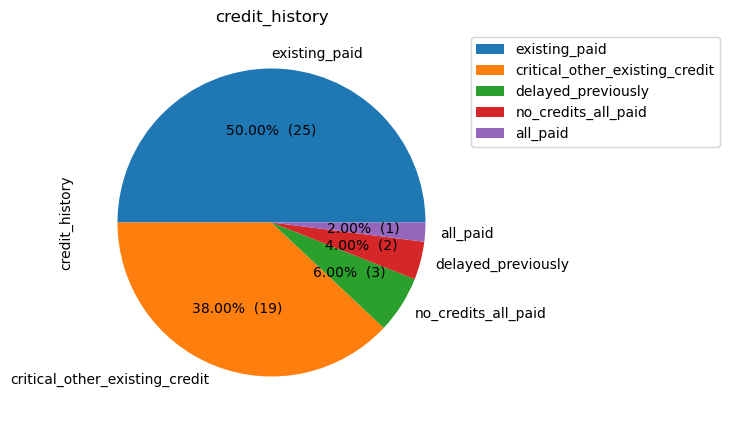

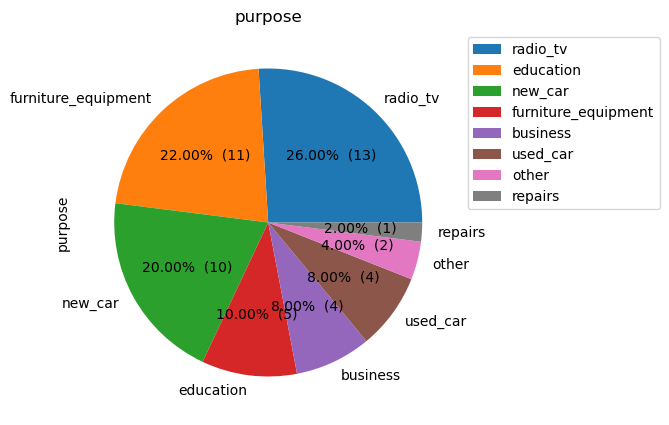

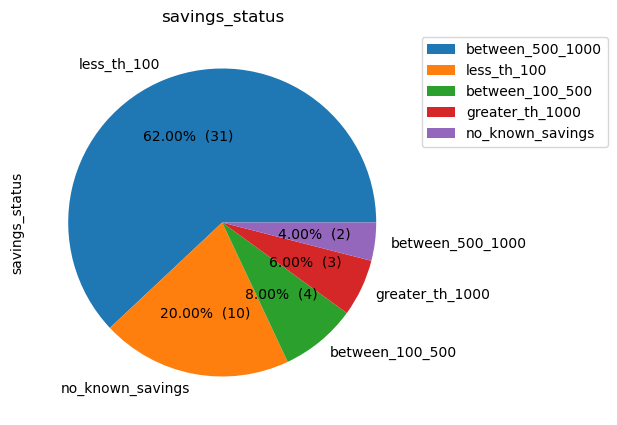

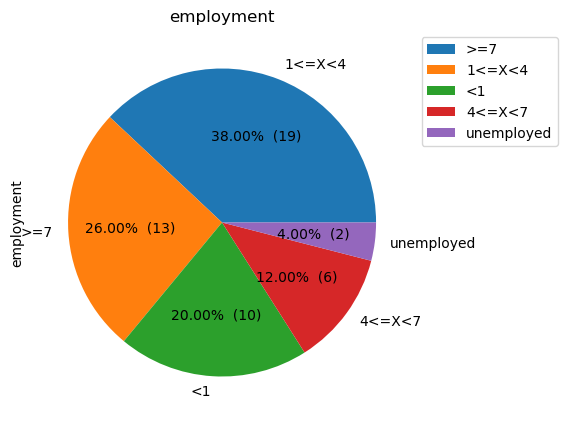

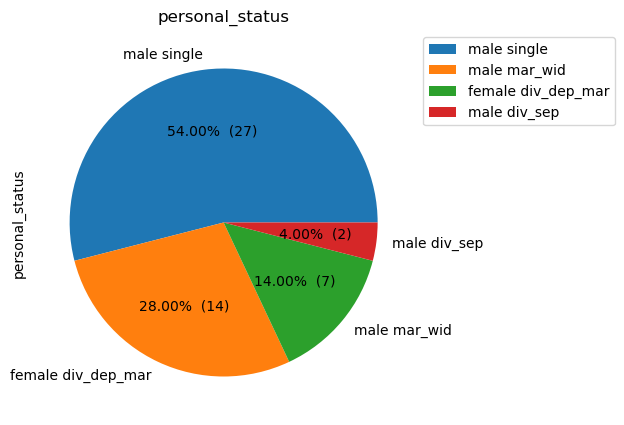

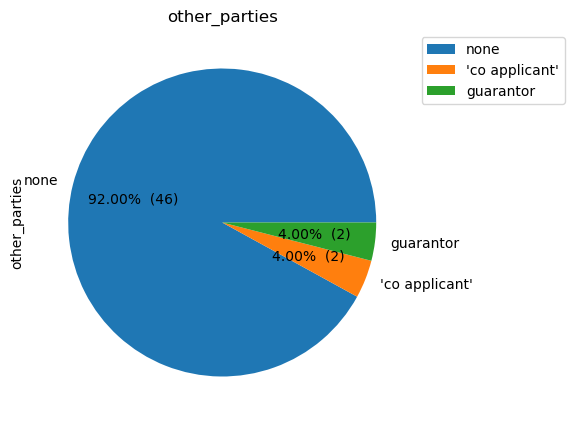

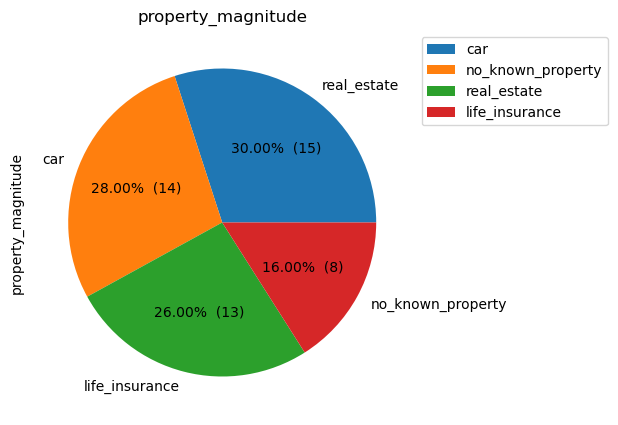

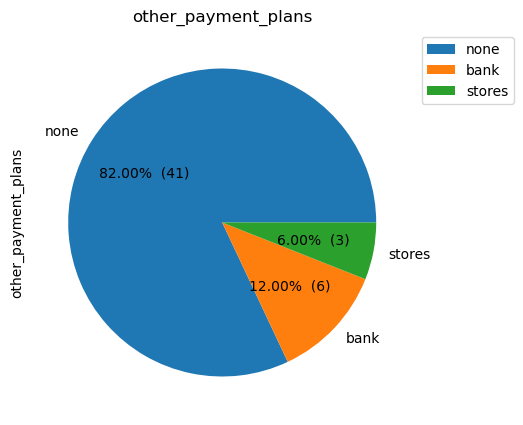

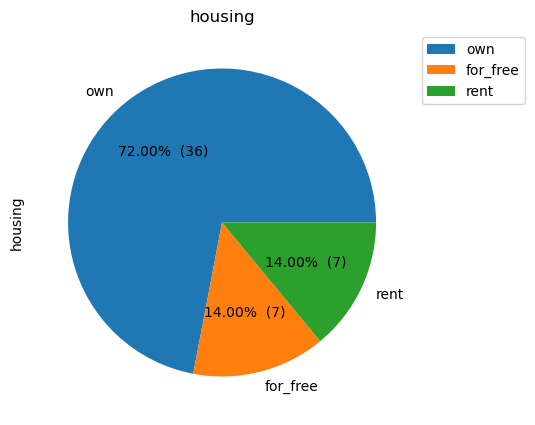

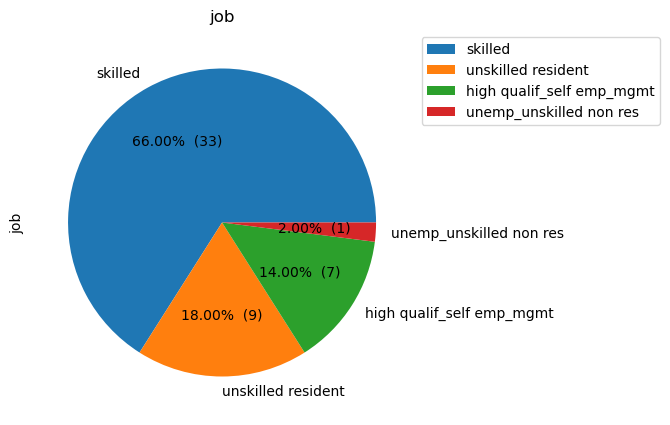

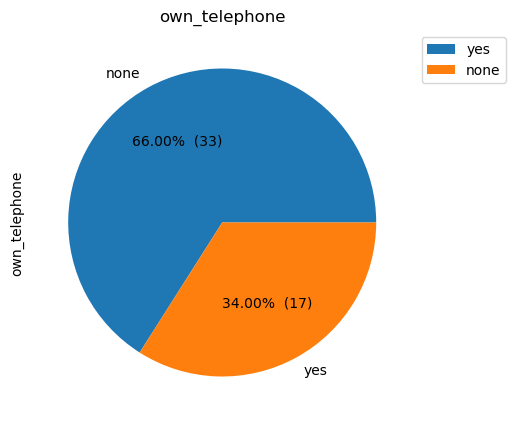

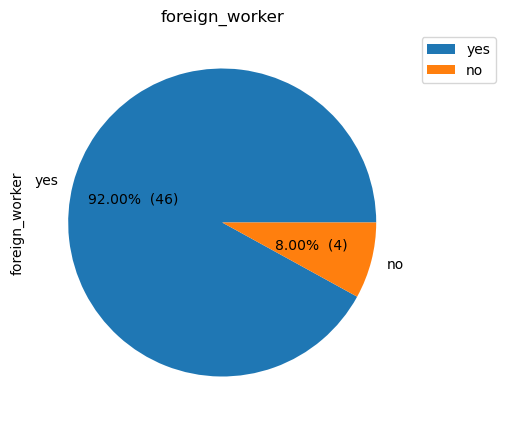

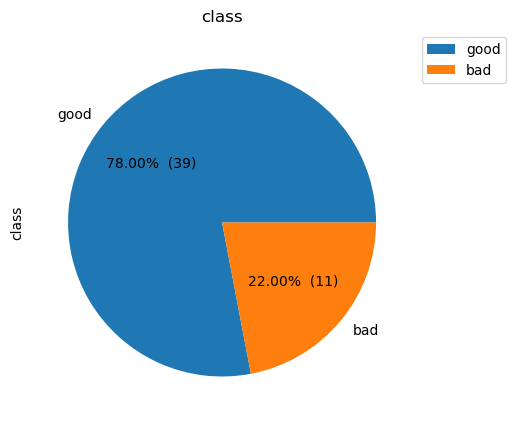

In [54]:
#graficar las distribuciones de frecuencia de df_obj por cada feature con un pie chart

for i in df_obj.columns:
    #añadir los valores de cada categoria en el pie chart
    #agregar el valor de cada categoria en el pie chart
    
    #definir una funcion que agregue el valor de cada categoria en el pie chart
    def my_autopct(pct):
        total = sum(df_obj[i].value_counts())
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        #'%1.2f%%'
    
    df_obj[i].value_counts().plot(kind='pie',figsize=(15,5),autopct=lambda pct: my_autopct(pct)).legend(labels=df_obj[i].unique(), loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(i)
    plt.show()

#for i in df_obj.columns:
    #df_obj[i].value_counts().plot(kind='bar',figsize=(15,5))    
    #df_obj[i].value_counts().plot(kind='pie',figsize=(15,5))
    #df_obj[i].value_counts().plot(kind='hist',figsize=(15,5))

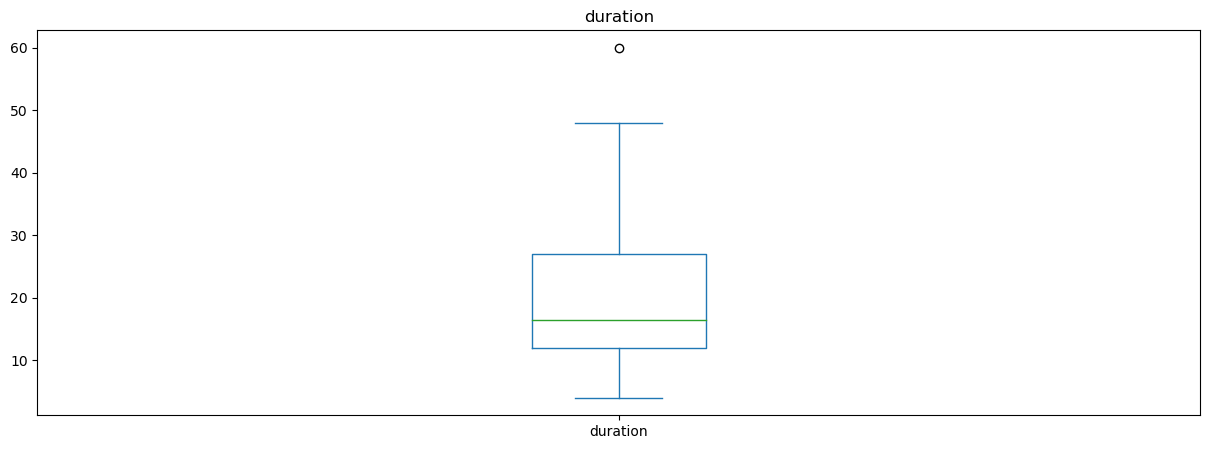

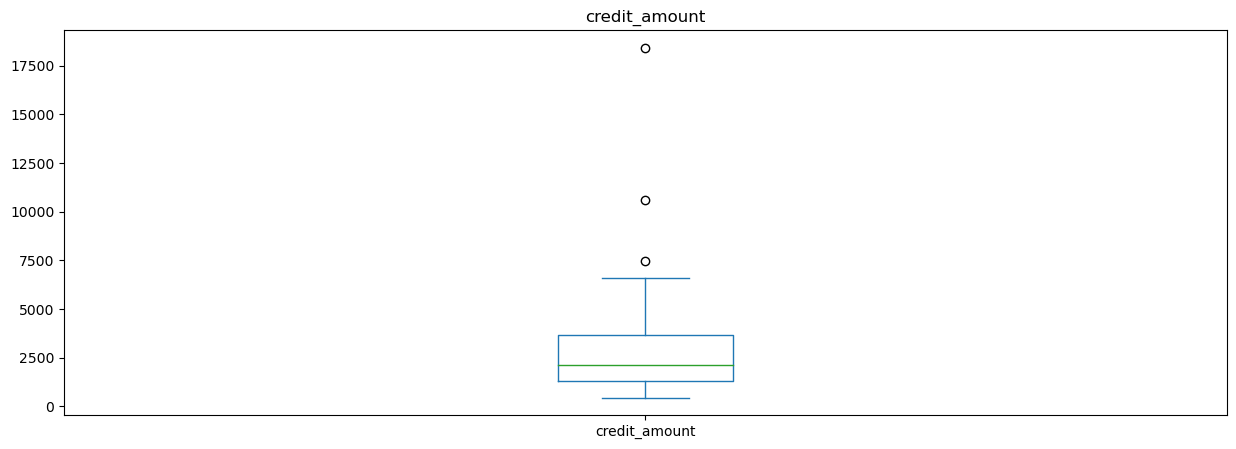

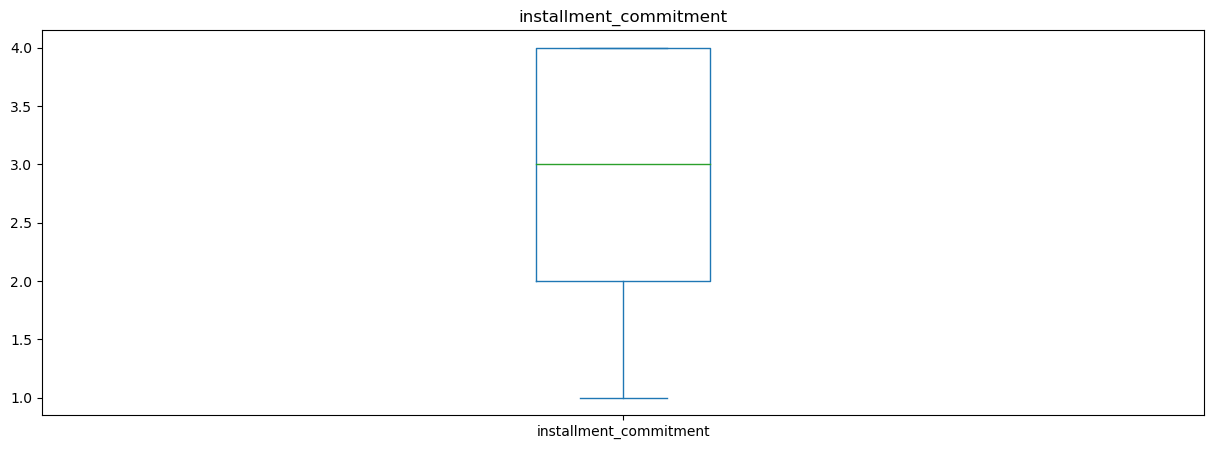

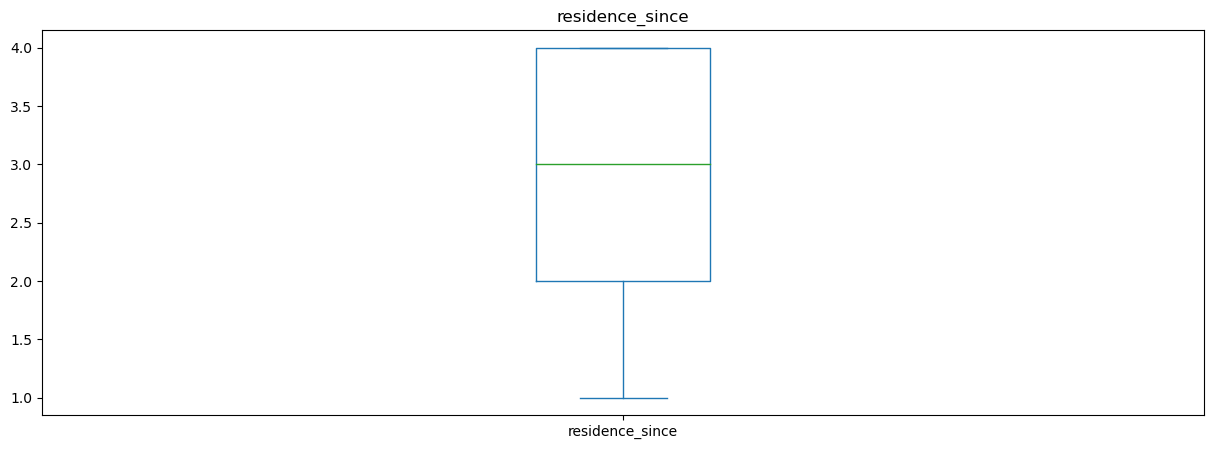

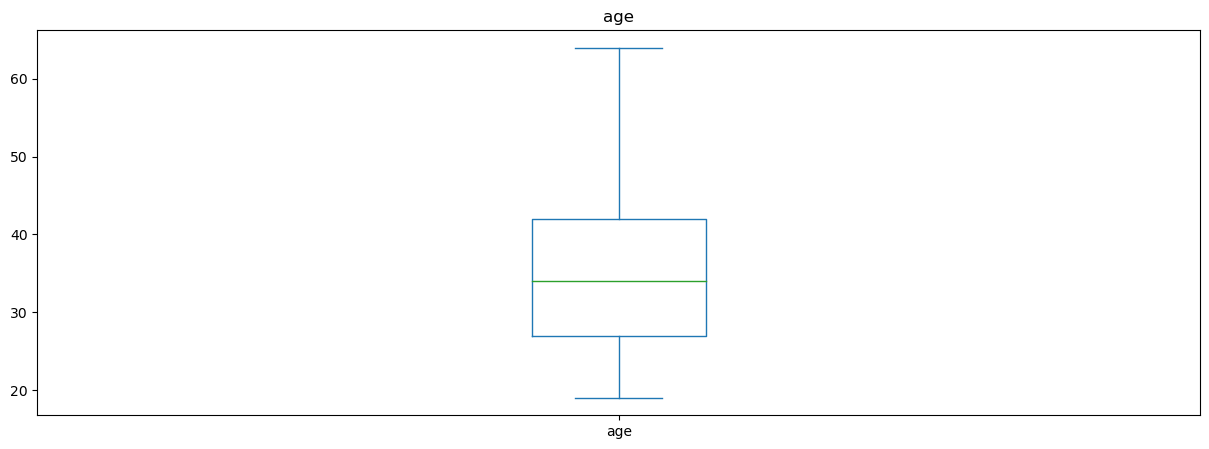

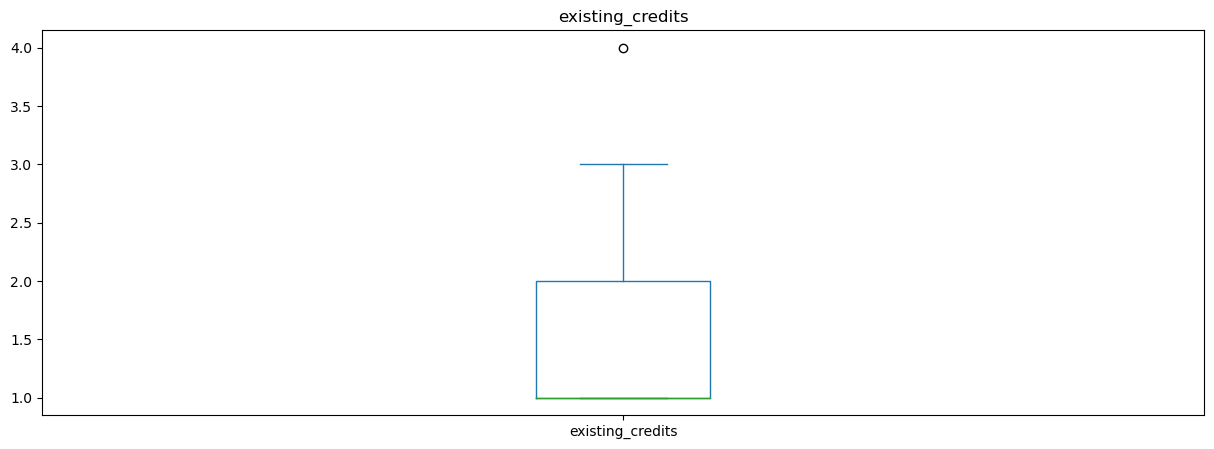

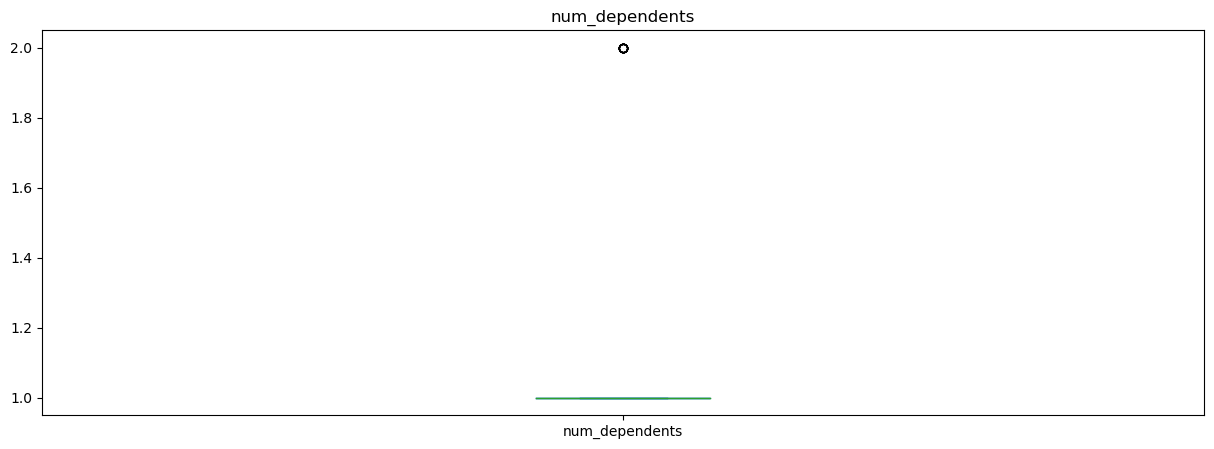

In [56]:
#graficar los boxplots del df_num por cada feature
for i in df_num.columns:
    df_num[i].plot(kind='box',figsize=(15,5))
    plt.title(i)
    plt.show()

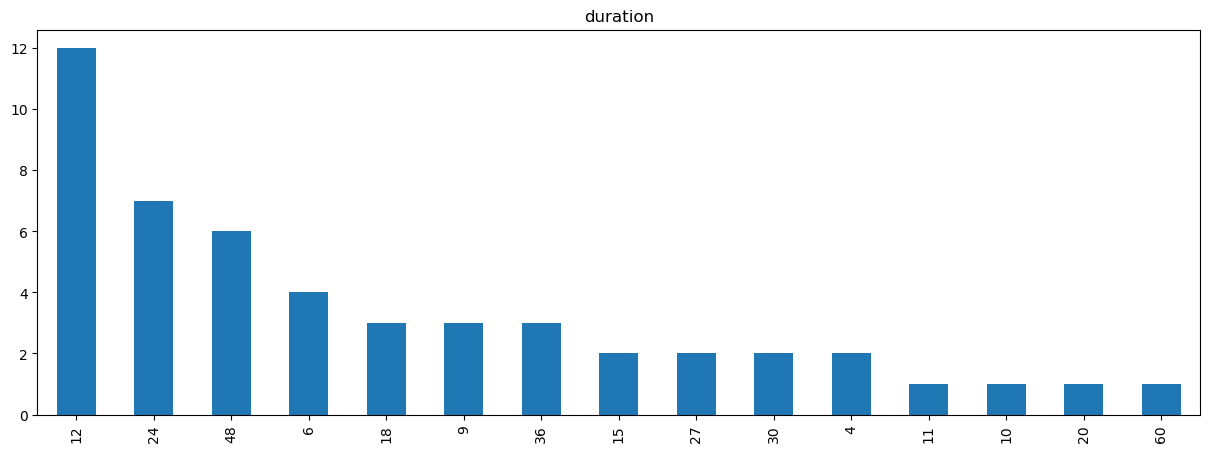

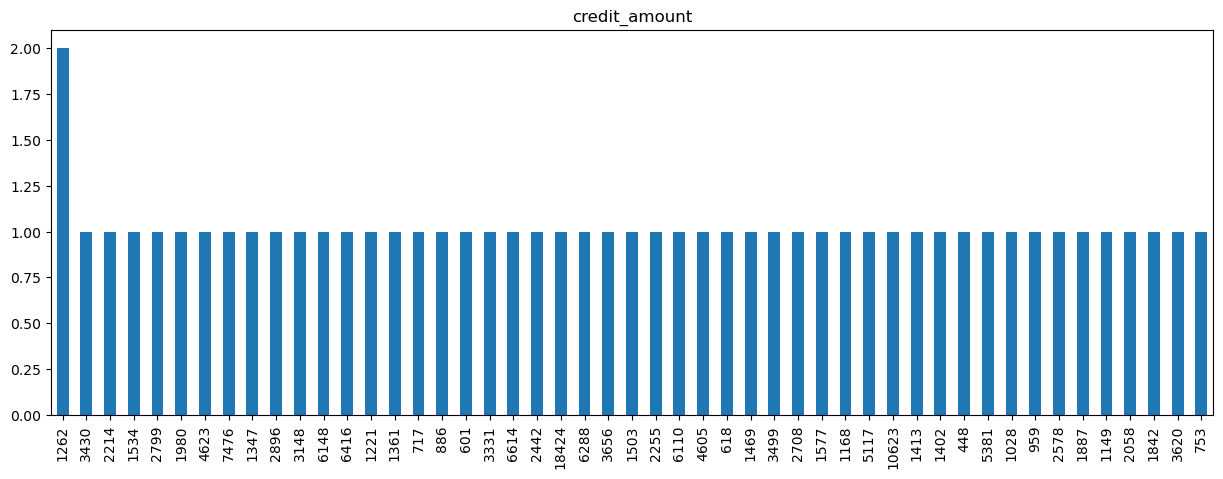

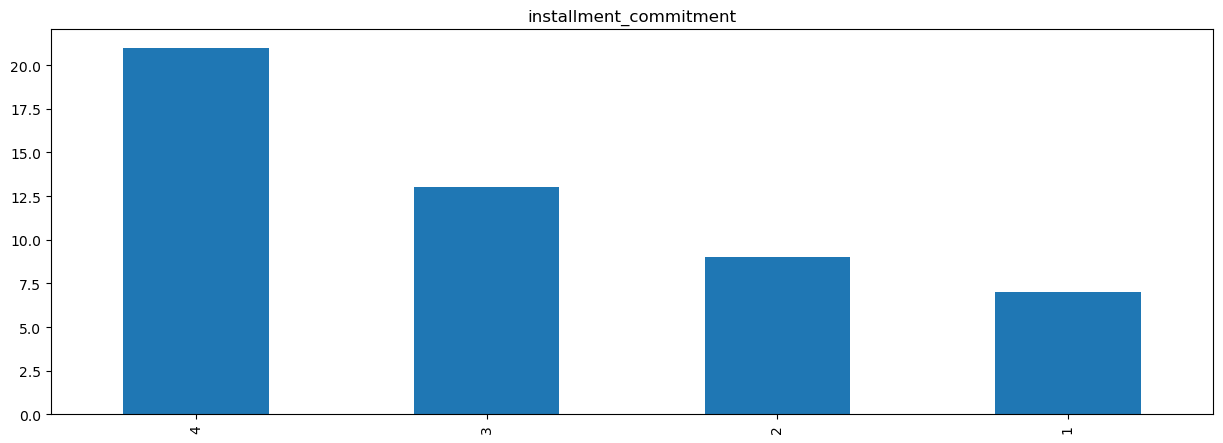

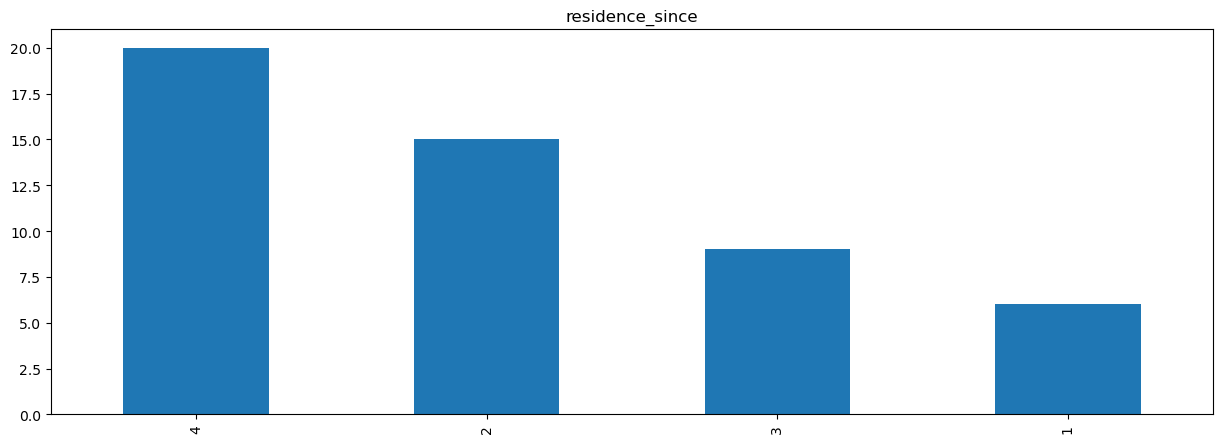

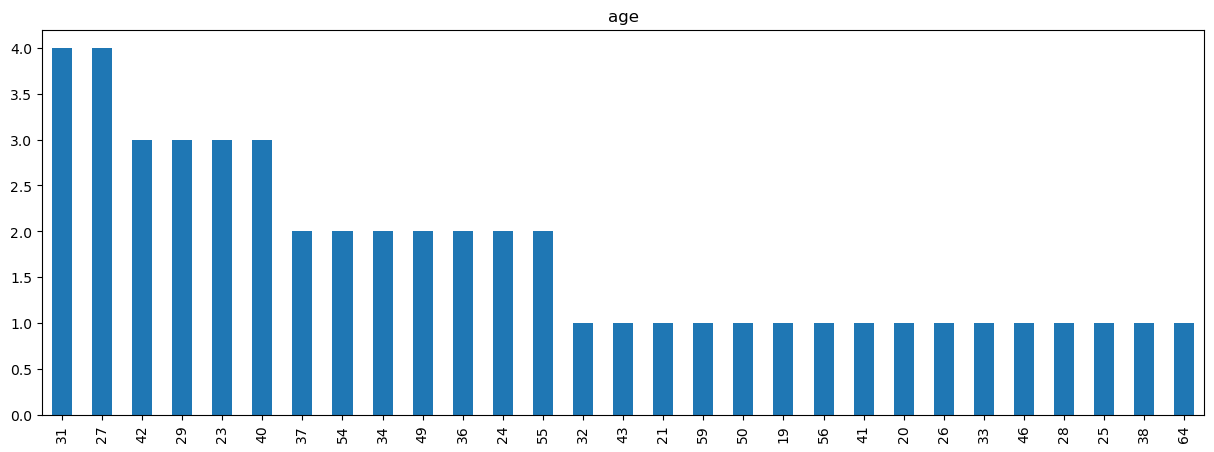

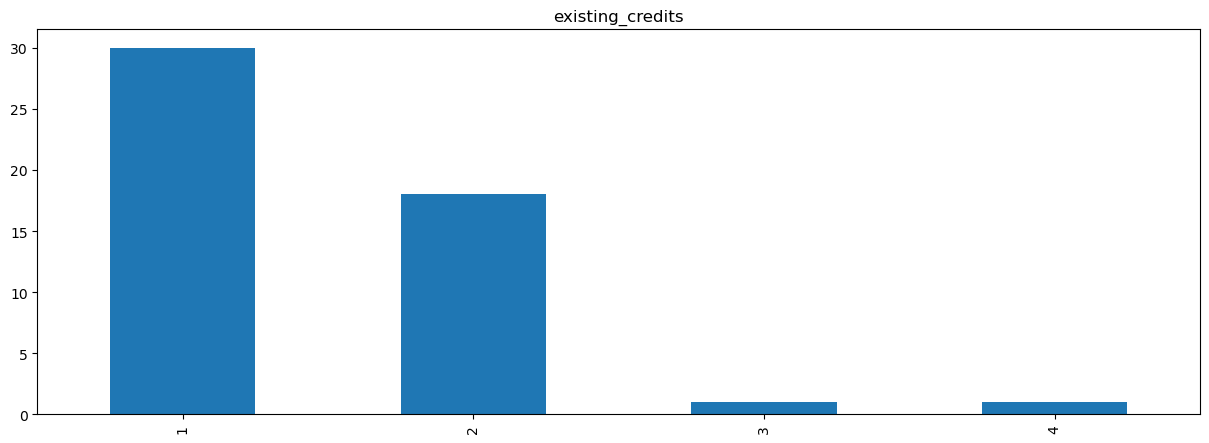

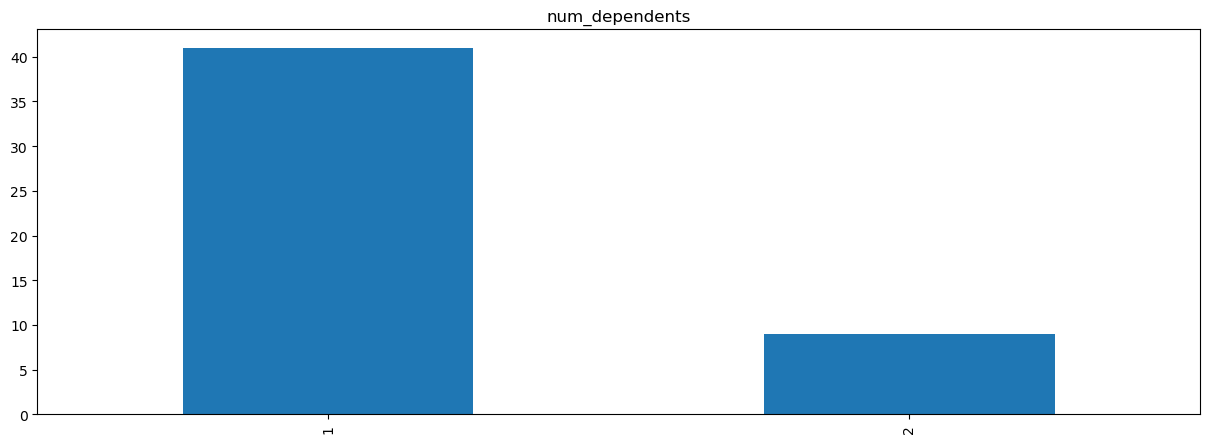

In [57]:
#graficar los bar plots del df_num por cada feature
for i in df_num.columns:
    df_num[i].value_counts().plot(kind='bar',figsize=(15,5))
    plt.title(i)
    plt.show()

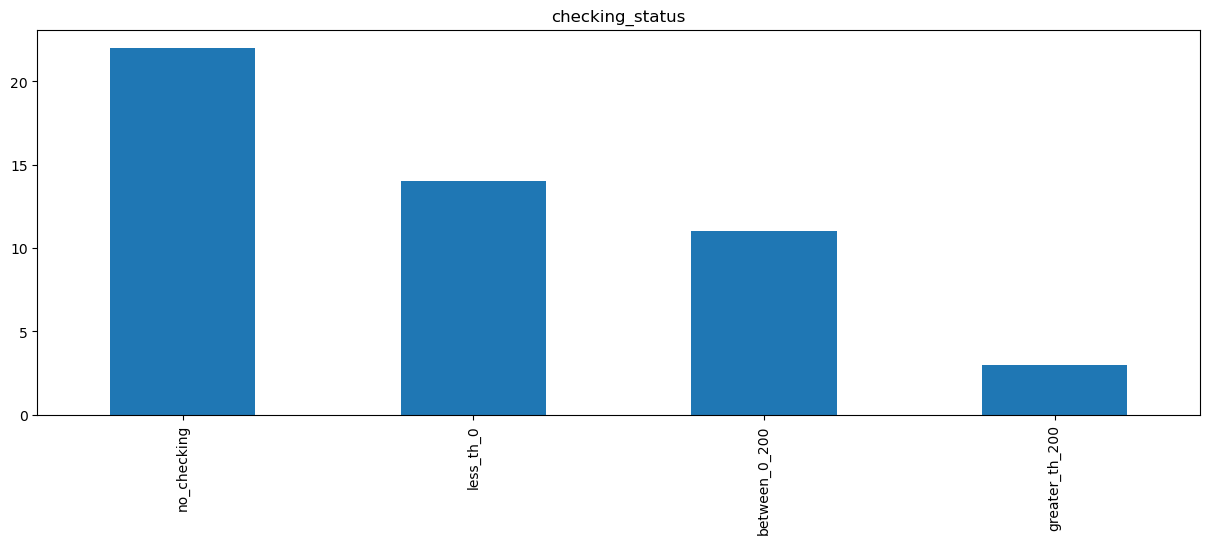

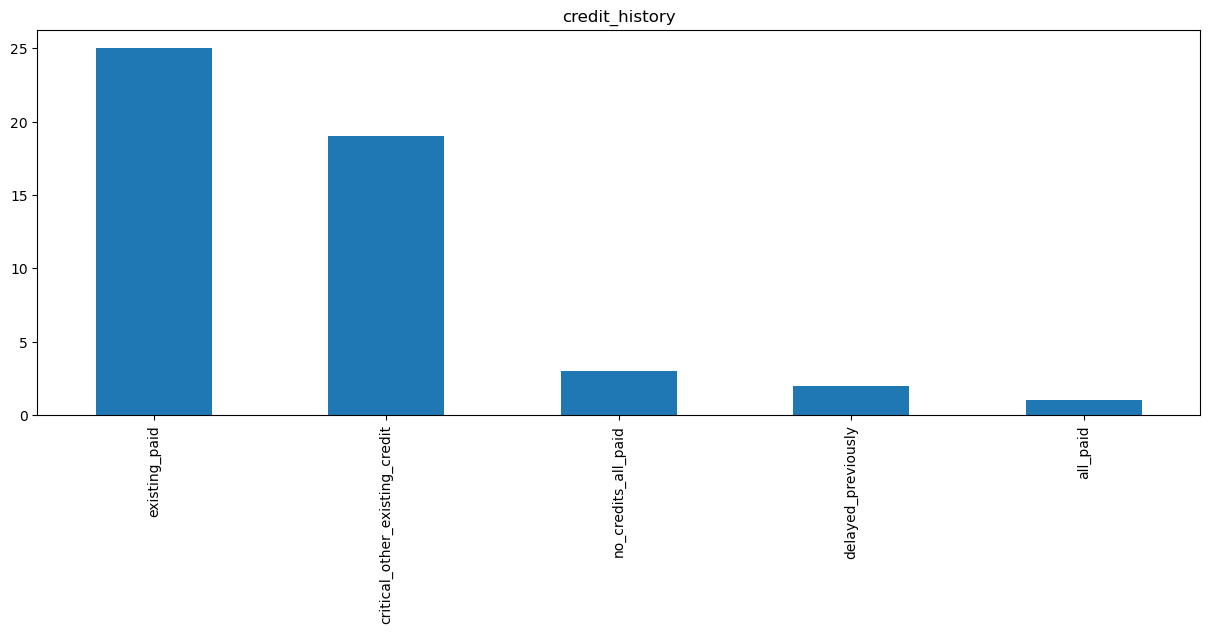

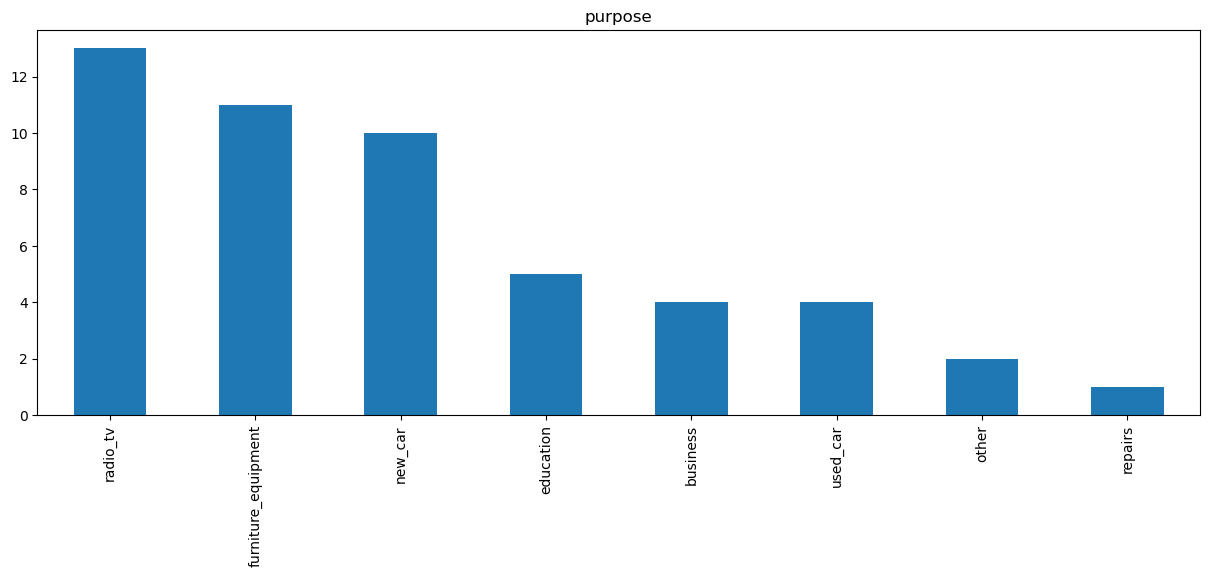

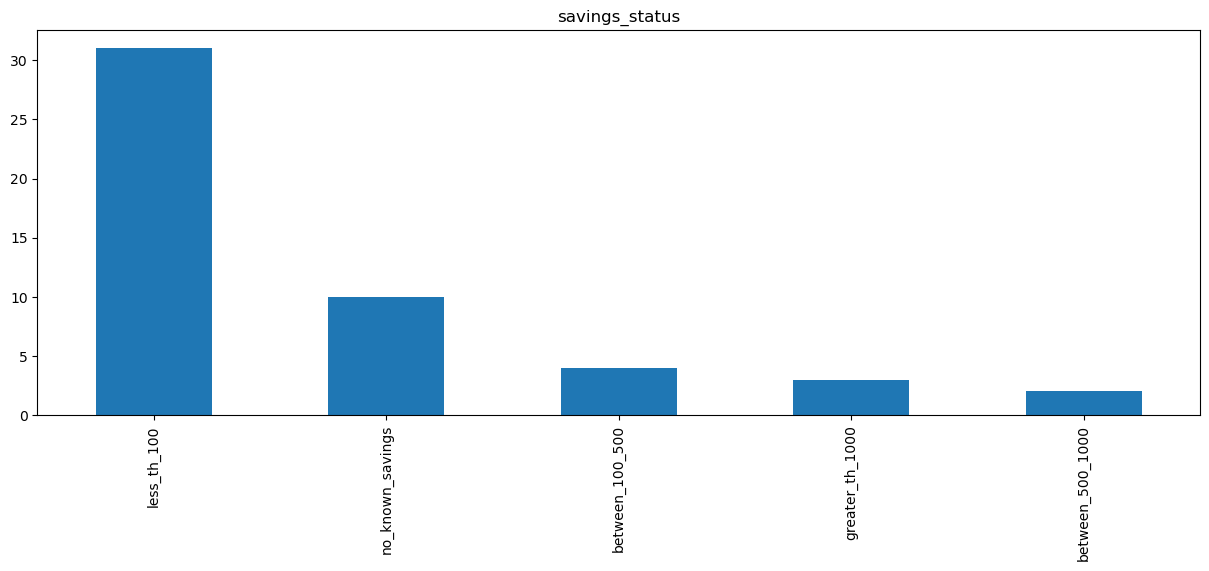

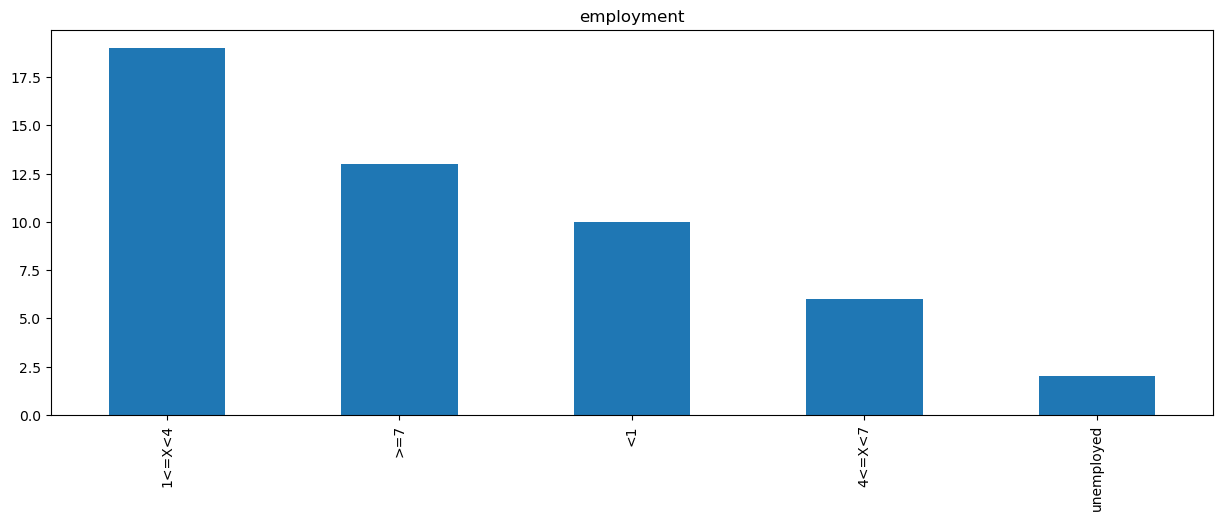

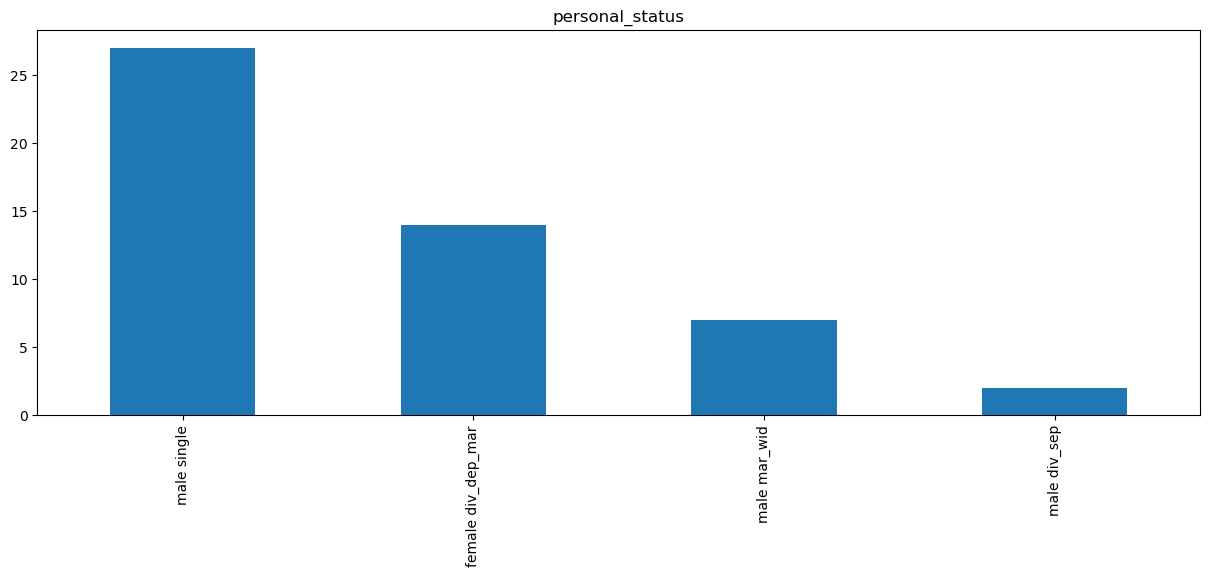

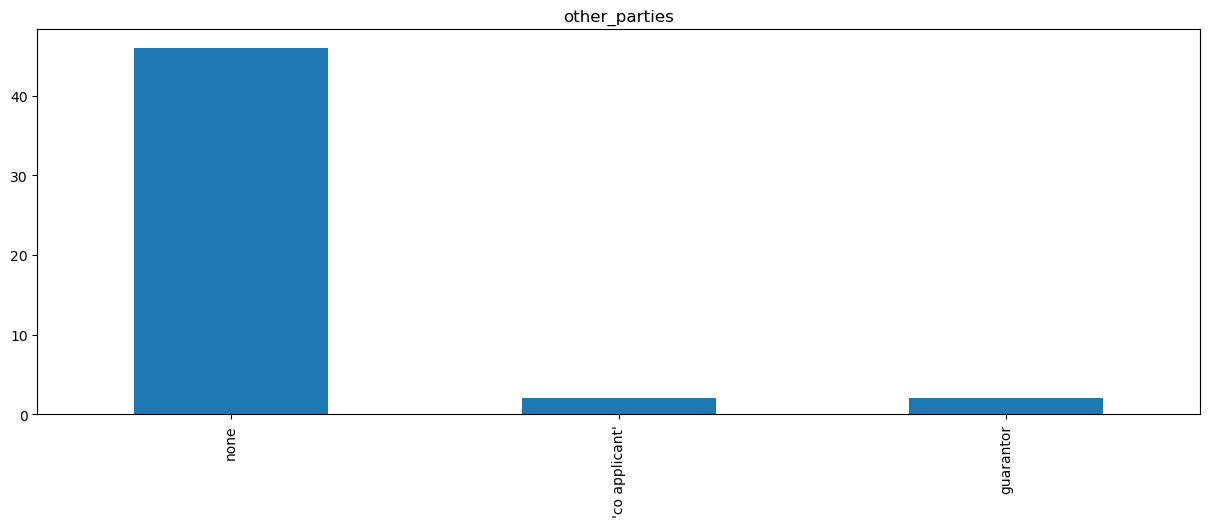

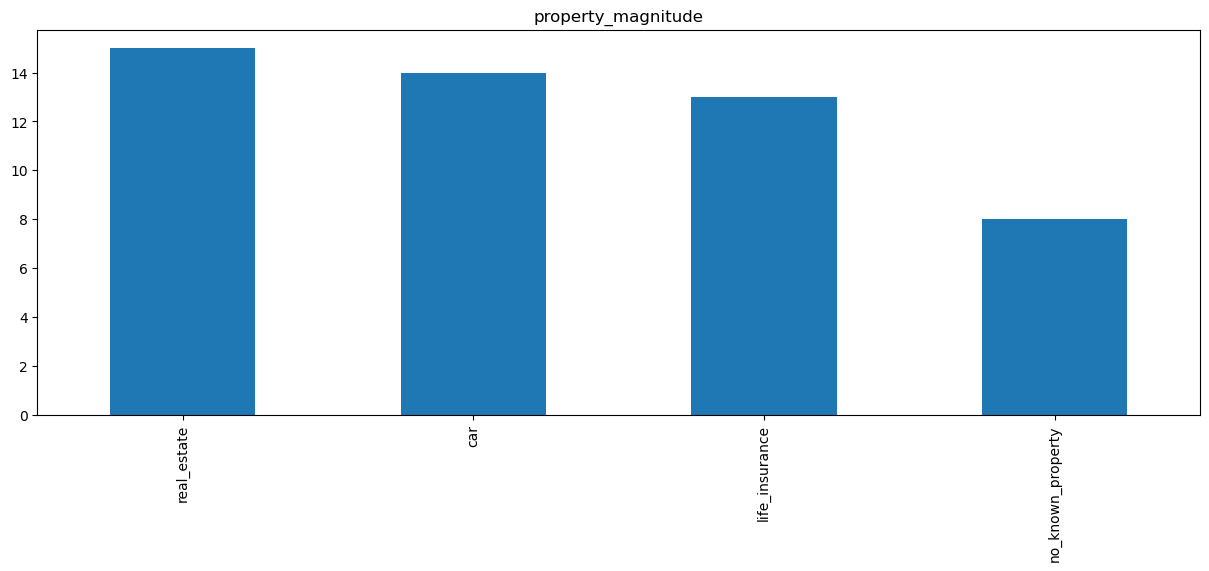

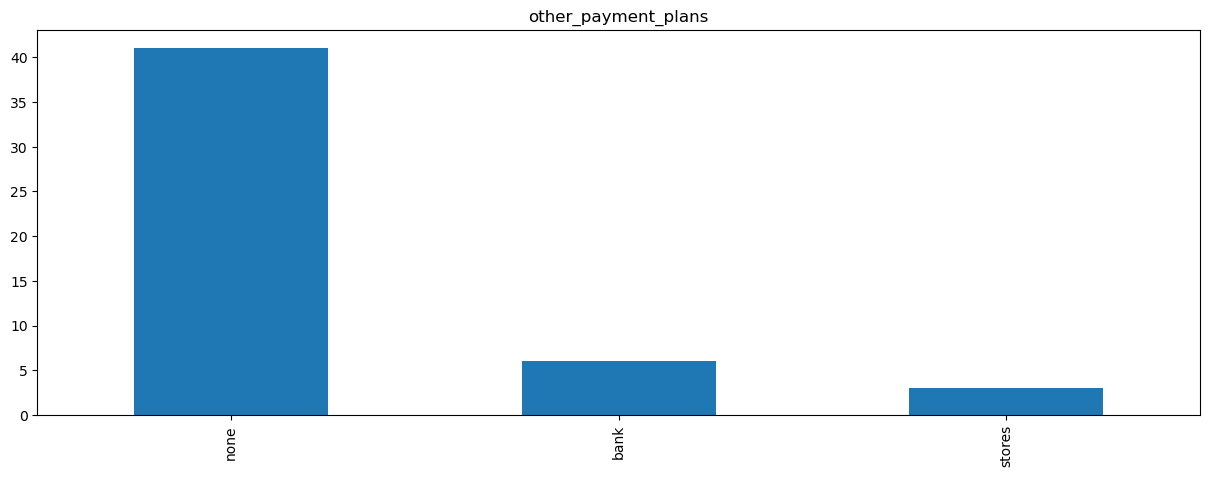

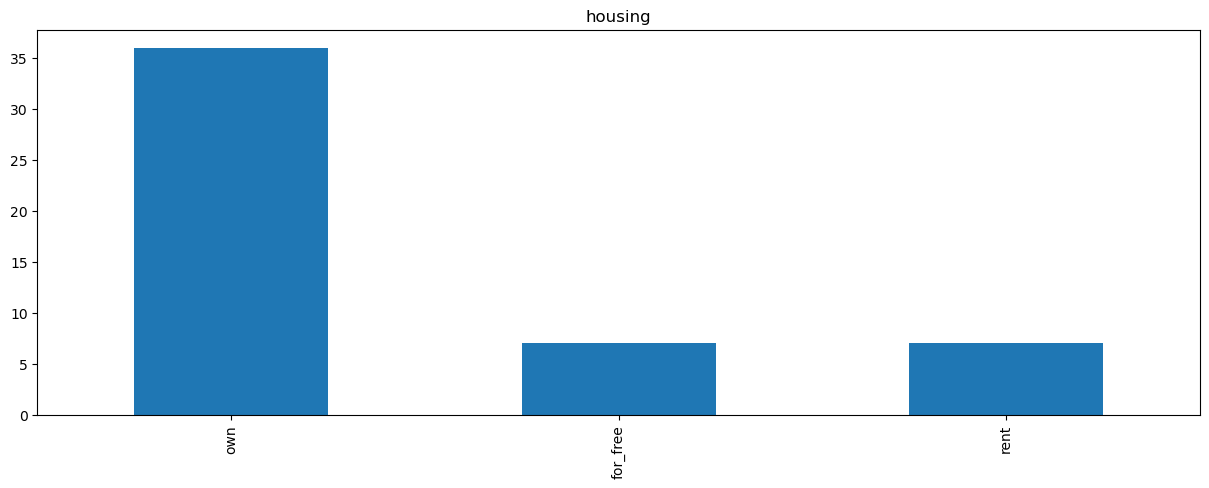

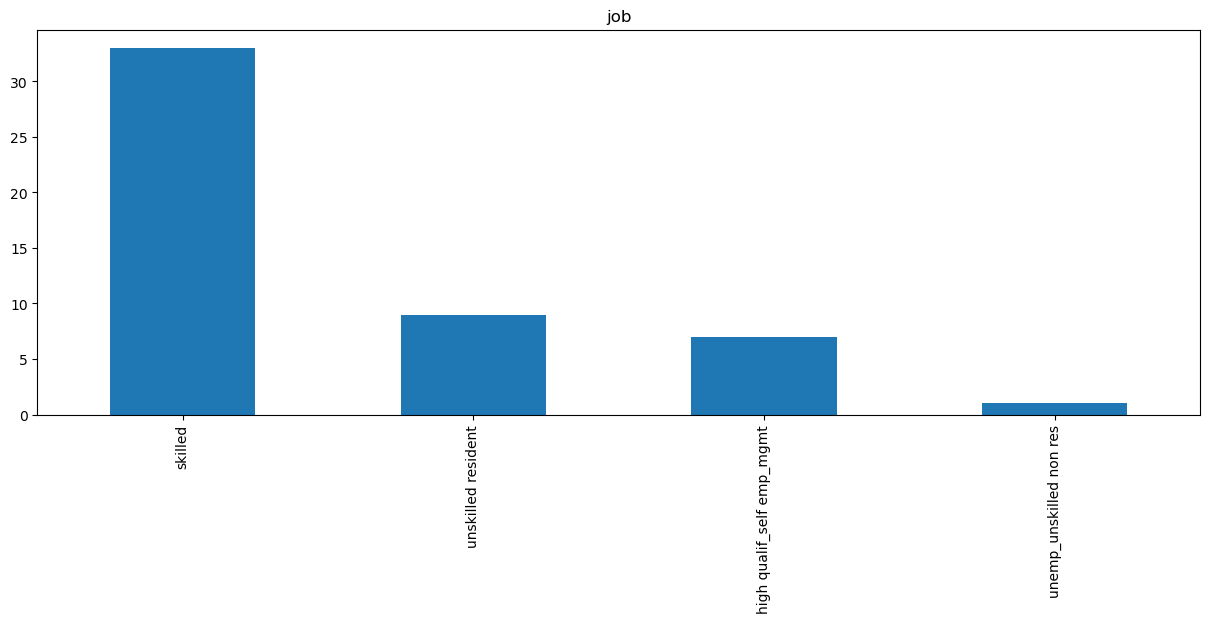

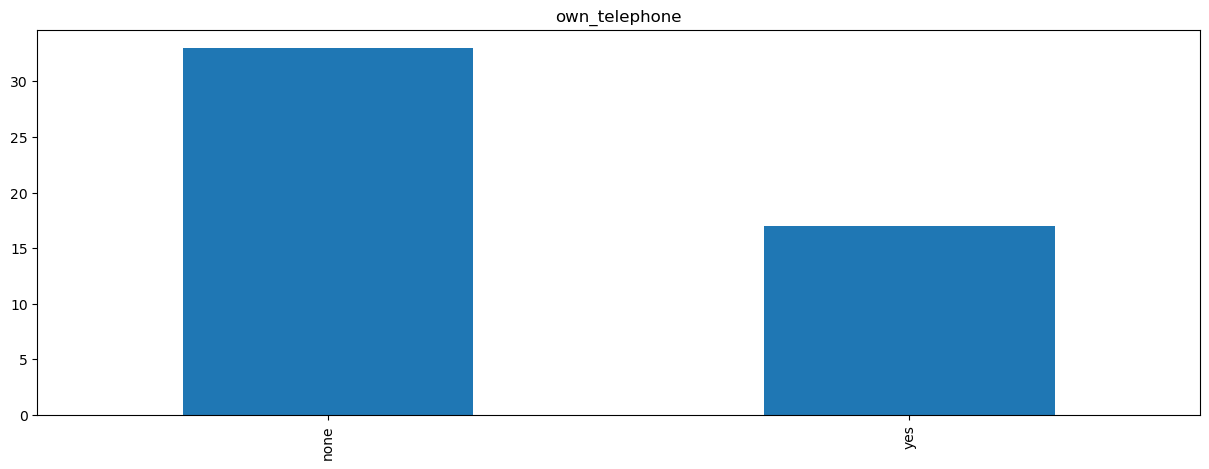

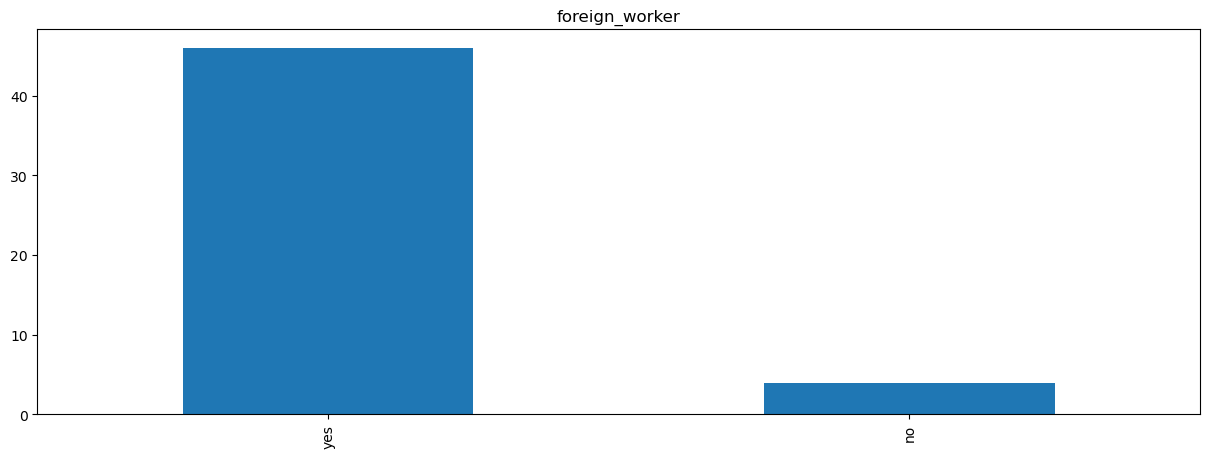

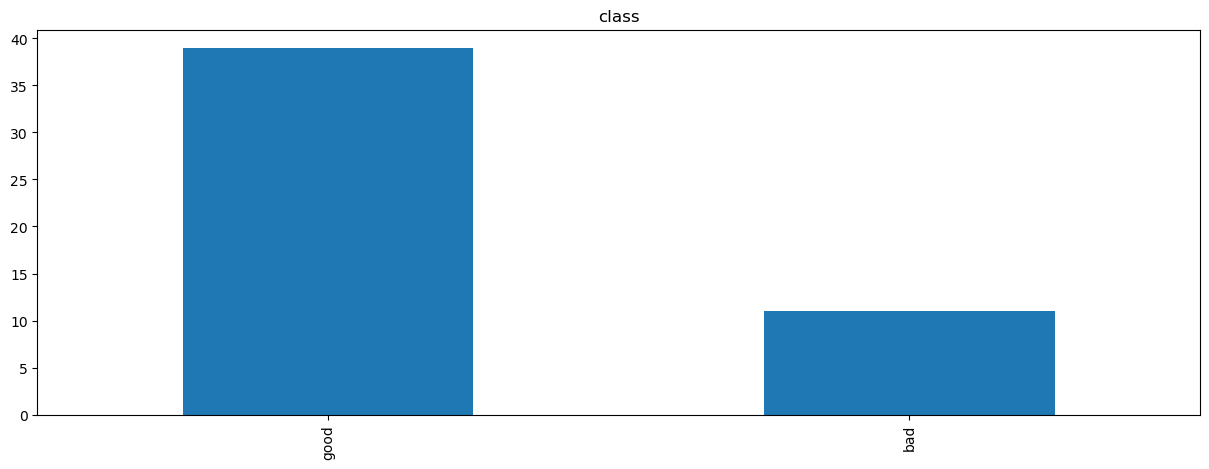

In [58]:
#graficar los bar plots del df_obj por cada feature
for i in df_obj.columns:
    df_obj[i].value_counts().plot(kind='bar',figsize=(15,5))
    plt.title(i)
    plt.show()

In [72]:
#graficar los heatmaps del df
df_num.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\dell_\AppData\Local\Temp\ipykernel_17076\3820636135.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_num.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.00,0.67,0.17,0.18,0.17,0.01,-0.01
credit_amount,0.67,1.00,-0.14,0.03,0.03,0.07,0.04
installment_commitment,0.17,-0.14,1.00,0.27,0.20,0.17,-0.27
residence_since,0.18,0.03,0.27,1.00,0.22,0.18,0.01
age,0.17,0.03,0.20,0.22,1.00,-0.08,-0.06
existing_credits,0.01,0.07,0.17,0.18,-0.08,1.00,0.31
num_dependents,-0.01,0.04,-0.27,0.01,-0.06,0.31,1.00


<Axes: >

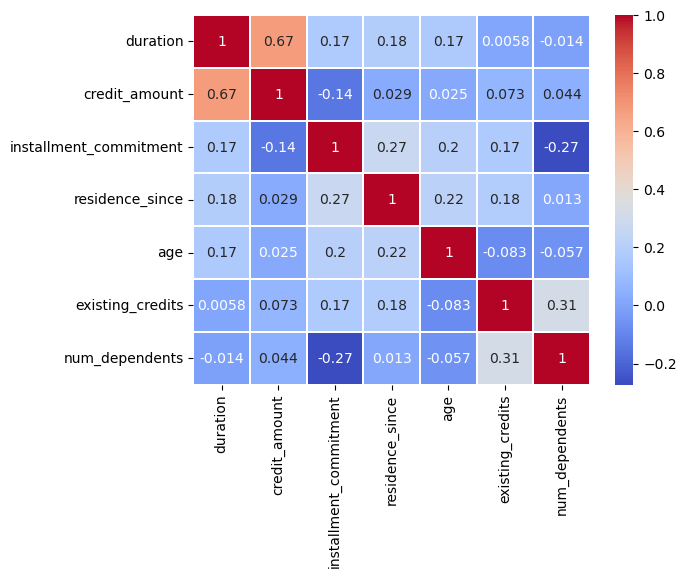

In [76]:
#graficar los heatmaps del df_num usando seaborn
df_num_corr = df_num.corr()
sns.heatmap(df_num_corr, annot=True, cmap='coolwarm', linewidths=0.2)

In [99]:
#6. Aplicar expresión matemática para el cálculo (CreditAmount / Duración)*residence_since
for i in df.index:
    df.loc[i,'CreditAmount/Duration*residence_since'] = (df.loc[i,'credit_amount']/df.loc[i,'duration'])*df.loc[i,'residence_since']
df['tasa_interes'] = df['CreditAmount/Duration*residence_since']
#eliminar la columna CreditAmount/Duration*residence_since
df.drop(columns='CreditAmount/Duration*residence_since',inplace=True)
df['tasa_interes'].head(10)

0    285.833333
1    381.875000
2    210.333333
3    206.000000
4    244.833333
5    583.166667
6    541.600000
7    143.363636
8    292.000000
9    758.074074
Name: tasa_interes, dtype: float64

In [134]:
'''#7. Discretizar duración, credit_amount, age, number_of_dependents.'''
#crear una funcion para discretizar la columna duration en 3 intervalos
df['duration_discretized'] = df['duration']
#agrupar los valores de la columna duration_discretized en 3 intervalos de igual tamaño
for i in df.index:
    if  df['duration_discretized'].loc[i] <= 20:
        df['duration_discretized'].loc[i] = 0
    elif df['duration_discretized'].loc[i] <= 40:
        df['duration_discretized'].loc[i] = 1
    elif df['duration_discretized'].loc[i] <= 60:
        df['duration_discretized'].loc[i] = 2
    else:
        df['duration_discretized'].loc[i] = 3



C:\Users\dell_\AppData\Local\Temp\ipykernel_17076\1346376901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_discretized'].loc[i] = 1
C:\Users\dell_\AppData\Local\Temp\ipykernel_17076\1346376901.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_discretized'].loc[i] = 2
C:\Users\dell_\AppData\Local\Temp\ipykernel_17076\1346376901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_discretize

In [136]:
print(df['duration'].describe().loc[['min','max']], df['duration'].value_counts(), sep='\n')
print(df['duration_discretized'].unique(), df['duration_discretized'].value_counts(), sep='\n')

min     4.0
max    60.0
Name: duration, dtype: float64
12    12
24     7
48     6
6      4
18     3
9      3
36     3
15     2
27     2
30     2
4      2
11     1
10     1
20     1
60     1
Name: duration, dtype: int64
[1 2 0]
0    29
1    14
2     7
Name: duration_discretized, dtype: int64


In [127]:
#crear una funcion para discretizar la columna duration en 3 intervalos
def discretize(column, n):
    df[column+'_discretized'] = df[column]
    #agrupar los valores de la columna duration_discretized en 3 intervalos de igual tamaño
    for i in df.index:
        if  df[column+'_discretized'].loc[i] <= df[column].min() + (df[column].max() - df[column].min())/n:
            df[column+'_discretized'].loc[i] = 0
        elif df[column+'_discretized'].loc[i] <= df[column].min() + 2*(df[column].max() - df[column].min())/n:
            df[column+'_discretized'].loc[i] = 1
        elif df[column+'_discretized'].loc[i] <= df[column].min() + 3*(df[column].max() - df[column].min())/n:
            df[column+'_discretized'].loc[i] = 2
        else:
            df[column+'_discretized'].loc[i] = 3
    print(df[column].describe().loc[['min','max']], df[column].value_counts(), sep='\n')
    print(df[column+'_discretized'].unique(), df[column+'_discretized'].value_counts(), sep='\n')

array([2, 3, 1], dtype=int64)

In [ ]:
#8. Obtenga la matriz de correlación de las variables numéricas.

In [ ]:
#9. Obtenga la tabla de relación de frecuencias entre los atributos job y purpose.

In [ ]:
#10. Mapear a valores diferentes para atributos own_telephone, foreign_worker.

In [ ]:
#11. Normalizar el campo instalment_commitment

In [ ]:
#12. Estandarizar el campo instalment_commitment 

In [ ]:
#13. De los gráficos Boxplot obtenidos quitar outliers por medio de Inter-quartil range

In [ ]:
#14. Utilice One-hot encoding en campo purpose.

In [ ]:
#15. Obtenga las instancias que cumplan la condición de un monto de crédito mayor a 3000

In [ ]:
#16. Obtenga las instancias que cumplen con la condición de que job sea igual a “skilled” y que el monto de crédito sea mayor a 2000.

In [ ]:
#17. Obtenga suma total del camp credit_amount agrupado por el campo purpose “new car”.

In [ ]:
#18. Obtenga age y class para los registros que tienen campo purpose “education” y housing “for_free”.

In [ ]:
#19. Obtenga el total y el promedio de credit amount agrupado por housing y class.